## 	E-commerce Landing Page AB Testing and Regression




## Table of Contents
- Introduction
- Part I - Probability
- Part II - A/B Test
- Part III - Regression
- Conclusion







# Introduction

For this project, we are looking at data taken from an e-commerce website. The company is testing out a new landing page, and want to see if the new landing page has a significant effect on the rate at which prospective customers convert to paid users.

# Part I - Probability

In [88]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

## a. Checking out the data.

In [58]:
df = pd.read_csv('./ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


## b. Counting the number of rows in the dataframe.

In [59]:
row_count = df.shape[0]
print(row_count)


294478


## c. Counting the number of unique users.

In [60]:
unique_users = df['user_id'].unique().shape[0]
unique_users
# Finding the number of unique users

290584

## d. Finding the proportion of users converted.

In [61]:
converted = (df['converted'] == 1).sum()

prop_converted = converted/row_count
prop_converted


0.11965919355605512

### e. A discrepancy in the data we should account for before any more probability calculations is the number of times the group doesn't line up with the page received. This would mean a user was assigned to the treatment group but didn't receive the new page (received the old page), or a user was assigned to the control group and received the new page. These would both be considered errors when performing the test (or simply an error in entering/recording the data).

In [62]:
x = df[ (df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].shape[0]
# x is the number of users who were labeled in the treatment group but did not receive the new page.
y= df[ (df['group'] != 'treatment') & (df['landing_page'] == 'new_page')].shape[0]
# y is the number of users who were labeled in the control group but received the new page.
x+y

3893

## f. Checking for missing values.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### No missing values!

## g. Creating a new dataframe with none of the discrepancies we discussed in part e. Also, create a variable for the number of unique users again.

In [73]:
df0 = df[ (df['group'] == 'control') & (df['landing_page'] == 'old_page')  ]
# Entries where the user labeled in the control group received the old page
df1=  df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
# Entries where the user labeled in the treatment group received the new page

df2=pd.concat([df0,df1])
# Concatenate the two dataframes created above as df2

unique_users_2=df2['user_id'].unique().shape[0]
# Variable for number of unique users in new dataframe created

df2.head()

# I made df2 into a dataframe taking the entries from the original dataframe which were not errors based on what we described
# in part e. Now, all the users in df2 which were assigned the control group received the old page, and all the users
# which were assigned the treatment group received the new page

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


## h. Checking our new dataframe.

In [74]:
# To make sure what we did was right, we can reuse the code from part e with different variable names, and using df2. 
# We should get 0.
x_new = df2[ (df2['group'] == 'treatment') & (df2['landing_page'] != 'new_page')].shape[0]
y_new= df2[ (df2['group'] != 'treatment') & (df2['landing_page'] == 'new_page')].shape[0]

x_new+y_new

0

## Looks good!

## i. Checking for duplicate user ids.

In [75]:
df2[df2['user_id'].duplicated()]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [76]:
# The only repeated user_id is 773192, row 2893

## j. Removing the duplicate row.

In [77]:
df2[df2['user_id'] == 773192].index
# Check what the indices are for the duplicated row.

Int64Index([1899, 2893], dtype='int64')

In [78]:
df2.drop(2893,inplace=True)
# Drop the duplicate row

In [79]:
df2[df2['user_id'].duplicated()]
# We reused the first cell in part i to make sure there's no more duplicates. 

,user_id,timestamp,group,landing_page,converted


### Looks good!

## k. Finding new probability for conversion


In [ ]:
unique_users_2

In [37]:
prob_convert = (df2['converted'] == 1).sum()/unique_users_2
prob_convert

0.11959708724499628

## l. Finding probability of conversion, given control group/old page.

In [28]:
prob_control = (df2['group'] == 'control').sum()/unique_users_2
# Counts the number of users in the control group, and divides by the number of users total to give probability of being
# in the control group.

prob_control_and_converted = (df2[  (df2['group'] == 'control')& (df2['converted'] == 1)].shape[0])/unique_users_2
prob_convert_given_control = prob_control_and_converted/prob_control
# Formula for conditional probability

prob_convert_given_control

0.12038630450046119

## m. Finding probability of conversion, given treatment group/new page.

In [29]:
prob_treatment = (df2['group'] == 'treatment').sum()/unique_users_2
# Counts the number of users in treatment group, and then divides by number of users total to give probability of being
# in the treatment group.

prob_treatment_and_converted = df2[  (df2['group'] == 'treatment')& (df2['converted'] == 1)].shape[0]/unique_users_2
prob_convert_given_treatment = prob_treatment_and_converted/prob_treatment
# Formula for conditional probability

prob_convert_given_treatment

0.11880806551510564

## n. What is the probability that an individual received the new page?

In [30]:
(df2['landing_page'] == 'new_page').sum()/unique_users_2
# Counts the number of users that landed on the new page, and then divides by the number of new users to give the probability
# of a user landing on the new page. Around half!

0.50006194422266881

Based on our findings above, I do not think there will be sufficient evidence to say the new treatment page leads to more conversions. There is only a difference of about .2% between converting given someone was in the treatment group versus being in the control group. In fact, the probability of converting given the treatment new page was provided is lower than that of conversion given the control page was provided. I speculate that this difference would not be enough evidence to say that the new treatment page leads to more conversions. To be able to say this with more confidence, we would have to run an A/B test.

<a id='ab_test'></a>
# Part II - A/B Test

 



Null Hypothesis: There is no difference in the ability to convert prospective customers into paying customers between the new page and the old page. 

$p_{new}$ = $p_{old}$
 
Alternative Hypothesis: There is a difference in the ability to convert prospective customers into paying customers between the new page and the old page

$p_{new}$ ≠ $p_{old}$

$p_{old}$ is the probability the old page converts a user.

$p_{new}$ is the probability the new page converts a user.


## o. Convert rate for $p_{new}$ under the null: 

In [38]:
p_new= prob_convert
p_new
# Convert rate for p_new and p_old under the null are the same, because of what we have as our null hypothesis

0.11959708724499628

## p.  Convert rate for $p_{old}$ under the null:

In [39]:
p_old = prob_convert
p_old

0.11959708724499628

## q. Find number of people who landed on the new page.

In [40]:
n_new = (df2[df2['landing_page'] == 'new_page']).shape[0]
n_new


145310

## r. Find number of people who landed on the old page.

In [41]:
n_old = (df2[df2['landing_page'] == 'old_page']).shape[0]
n_old

145274

## s. Simulate 10,000 $p_{new}$ - $p_{old}$ values 

In [81]:
np.random.binomial(n_new,p_new,10000)
# Testing random binomial.

array([17463, 17156, 17589, ..., 17443, 17389, 17299])

In [ ]:

# n_new trials, each entry in the array is the number of successful conversions in n_new trials with probability of 
# success p_new. There are 10000 entries. So, to get 10000 p_news, or probability of success for the new page 
# converting a user, divide the array by n_new


In [89]:
new_page_converted_simulations = np.random.binomial(n_new,p_new,10000)/n_new

In [85]:
#Do the same for old pages.

In [90]:
old_page_converted_simulations = np.random.binomial(n_old,p_old,10000)/n_old

In [91]:
p_diffs = new_page_converted_simulations-old_page_converted_simulations

In [92]:
p_diffs

array([ 0.00014954,  0.00069297,  0.00017685, ...,  0.00050732,
       -0.00047018, -0.00122727])

## t. Plot a histogram of the **p_diffs**.  

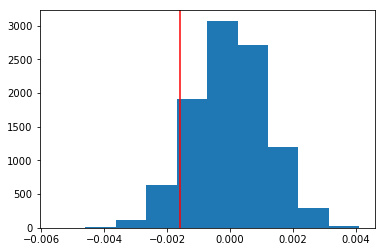

In [93]:
import matplotlib.pyplot as plt
plt.hist(p_diffs)
plt.axvline(x = prob_convert_given_treatment-prob_convert_given_control,color='red')
# plots the histogram

## u. Find proportion of p_diffs greater than the actual difference observed (otherwise known as the p value)


In [90]:
(p_diffs > prob_convert_given_treatment- prob_convert_given_control).mean()
# p value calculation

0.90969999999999995

What we computed in part u is the probability of finding the observed results, given that the null hypothesis is true. This is called the p value. If we wanted to have a type one error rate of 0.05, if our p-value is less than this, we would be able to say we have sufficient statistical evidence to reject the null hypothesis. Because our p-value is 0.9097, and this is greater than the supposed type one error rate we would like to stay under, we are unable to reject the null hypothesis. We stick with the hypothesis that there is no difference between the new and old pages in terms of effectiveness at converting users.

<a id='regression'></a>
# Part III - A regression approach

We'll be using logistic regression, as the data we are concerned with in each row is whether a user converted or not. In other words, the number for "converted" is either a 1 or a 0. We would use linear regression if the values we were examining for each row were not restricted in this way, but rather, allowed to be any numbers.

In [43]:
df2['intercept'] = 1
df2.head()
# Add intercept column

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


In [44]:
df2[['ab_page','t']] = pd.get_dummies(df['landing_page'])
df2.head()
# Add dummy variable columns

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,t
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1


In [45]:
del df2['t']
# Delete the extra column

In [46]:
df2.head()
# Check if the DataFrame looks how we want it to.

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


In [47]:
df2.tail()
# Check if the DataFrame looks how we want it to, continued.

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,1,1
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,1,1
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,1,1
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,1,1
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1


In [49]:
import statsmodels.api as sm
lm = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = lm.fit()
# Using stats models library functions to instantiate the model, and then fit the model.

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [50]:
results.summary()
# Summary of results

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Jan 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:02:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

The p-value associated with ab_page here is 0.190. 

The null hypothesis for my regression model is that parameter for the slope associated with changes in the landing page is equal to 0. The alternative hypothesis is that the parameter for the slope associated with changes in the landing page is not equal to 0.

i.e.
H0: The landing page is not a significant factor in predicting whether or not a person will convert.
HA: The landing page is a significant factor in predicting whether or not a person will convert.

With a type one error rate of 0.05, we are again unable to reject the null hypothesis. We can not say that the landing page is a significant factor in predicting whether or not a person will convert.

<a id='conclusions'></a>
## Conclusions

For both of our tests, we were unable to reject the null hypothesis. We could not say that the difference between the new page and the old page in terms of conversion rate is nonzero. We also could not say that the landing page is a significant factor in predicting whether or not a person will convert. These results do not contradict each other,